In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_excel('../../product_performance_blstm\dataset_new.xlsx',sheet_name='train')
data

,KodeBarang,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,cluster
0,04121,7,9,6,9,40,0,3,0,7,...,67,77,11,57,43,50,37,21,136,0
1,18031,230,227,279,153,190,256,267,305,238,...,336,153,103,221,360,280,240,120,548,1
2,04161,102,50,45,41,71,11,52,14,66,...,21,20,7,33,21,28,30,10,18,0
3,04162,272,155,214,226,268,110,204,253,193,...,102,118,120,211,292,105,108,101,117,1
4,04163,28,28,29,52,44,21,47,15,24,...,18,23,22,16,22,31,36,17,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,04157,55,64,44,61,30,1,24,37,67,...,20,10,300,34,7,7,6,4,21,0
102,18104,46,295,83,112,70,40,18,140,97,...,47,54,27,15,57,132,66,34,146,0
103,18106,200,204,0,2,10,7,0,27,74,...,15,136,15,15,14,131,84,12,14,0
104,18092,297,418,329,70,498,59,298,376,259,...,450,498,254,260,336,493,438,408,322,1


In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
len(data['cluster'].unique())

4

In [5]:
#now lets take clusters
c0 = data.query("cluster == 0")
print("Jumlah Produk:")
print(c0['KodeBarang'].size)
c1 = data.query("cluster == 1")
print("Jumlah Produk:")
print(c1['KodeBarang'].size)
c2 = data.query("cluster == 2")
print("Jumlah Produk:")
print(c2['KodeBarang'].size)
c3 = data.query("cluster == 3")
print("Jumlah Produk:")
print(c3['KodeBarang'].size)

Jumlah Produk:
70
Jumlah Produk:
31
Jumlah Produk:
4
Jumlah Produk:
1


In [6]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

In [7]:
# Time data into windows
def time_data(data, window):
  x = []
  y = []
  for i in range((len(data)-1)-window-1):
    x.append(data[i:(i+window),0])
    y.append(data[i+window,0])
  return np.array(x),np.array(y)

In [8]:
col = c2.KodeBarang.values
col

array(['18004', '18063', '04105', '18111'], dtype=object)

In [9]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c2=c2.drop(columns=['KodeBarang','cluster'])
c2

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
17,5307,3231,4562,372,4159,1853,6741,2884,5721,2573,...,2184,3210,2794,1243,2619,3888,1659,1971,2877,2138
30,3027,2097,6983,1318,2965,840,3094,1826,3463,5040,...,792,620,1265,910,713,867,630,860,758,747
48,2934,1481,1946,2130,2152,1563,1975,2426,1844,1944,...,1717,1858,1922,1731,2472,1846,2291,2199,1849,2180
82,0,33,2,0,3,27,23,9,7,-2,...,5597,2573,5687,5273,3236,8910,4665,7150,6726,5124


<AxesSubplot:>

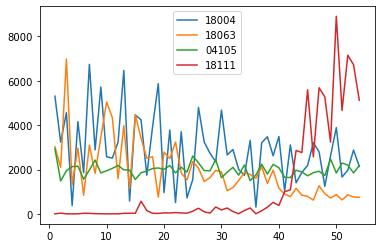

In [10]:
c2.set_index(col,inplace=True)
c2.T.plot()

In [11]:
c2

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
18004,5307,3231,4562,372,4159,1853,6741,2884,5721,2573,...,2184,3210,2794,1243,2619,3888,1659,1971,2877,2138
18063,3027,2097,6983,1318,2965,840,3094,1826,3463,5040,...,792,620,1265,910,713,867,630,860,758,747
04105,2934,1481,1946,2130,2152,1563,1975,2426,1844,1944,...,1717,1858,1922,1731,2472,1846,2291,2199,1849,2180
18111,0,33,2,0,3,27,23,9,7,-2,...,5597,2573,5687,5273,3236,8910,4665,7150,6726,5124


In [12]:
data_18004 = c2.iloc[[0]]
data_18063 = c2.iloc[[1]]
data_04105 = c2.iloc[[2]]
data_18111 = c2.iloc[[3]]

In [13]:
def preprocessing(data):
    new_data=[]
    time=[]
    for idx,a in enumerate(data):
        new_data.append(data[a].mean())
        time.append(idx)
    series=new_data
    min = np.min(series)
    max = np.max(series)
    series = series - min
    series = series / (max-min)
    time = np.array(time)
    split_time = 6
    time_train = time[:-split_time]
    train =  series[:-split_time]
    time_valid =  time[-split_time:]
    valid =  series[-split_time:]
    window_size = 2
    batch_size = 2
    shuffle_buffer_size = 10

    train_set = windowed_dataset(train, window_size, batch_size, shuffle_buffer_size)
    valid_set = windowed_dataset(valid, window_size, batch_size, shuffle_buffer_size)
    return train_set, valid_set ,valid,series,split_time
    
    

## 18004

<AxesSubplot:>

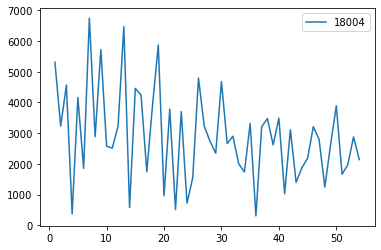

In [14]:
data_18004.T.plot()


In [15]:
train_set,valid_set,valid,series,split_time = preprocessing(data_18004)

In [16]:
train_set

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

In [17]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(1, activation='relu')
    ])

    

    #the blstm part

In [18]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150,validation_data=valid_set, batch_size=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 2)           4         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         34304     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               5

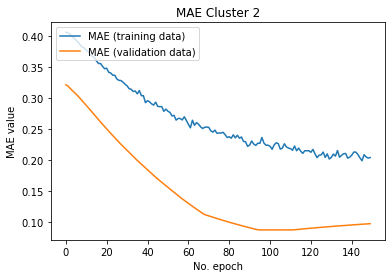

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 2")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

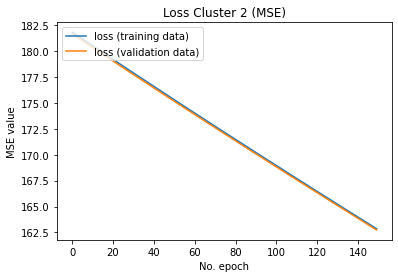

In [20]:
plt.plot(hist.history['loss'], label='loss (training data)')
plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 2 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [21]:
prediksi=model.predict(np.array(valid).reshape(-1,1,1))
prediksi

array([[0.32062727],
       [0.32263386],
       [0.3189903 ],
       [0.31953686],
       [0.32105994],
       [0.3198241 ]], dtype=float32)

In [22]:
prediksi=prediksi.flatten()

In [23]:
hasil=np.concatenate((series[:-split_time],prediksi))

In [24]:
hasil

array([0.7771908 , 0.45463021, 0.66143567, 0.01041019, 0.59881914,
       0.24052206, 1.        , 0.40071473, 0.84151647, 0.35239279,
       0.34338098, 0.45556246, 0.95696085, 0.04303915, 0.64527657,
       0.61124922, 0.22327533, 0.56121815, 0.86482287, 0.10161591,
       0.54008701, 0.03185208, 0.52750155, 0.06448104, 0.19359851,
       0.69779366, 0.45509633, 0.37771908, 0.31727781, 0.67899316,
       0.36575513, 0.40320075, 0.26398384, 0.22234307, 0.46768179,
       0.        , 0.45059043, 0.4928527 , 0.35969546, 0.49456184,
       0.11233686, 0.43567433, 0.16998135, 0.24300808, 0.29195152,
       0.45136731, 0.38673089, 0.1457427 , 0.32062727, 0.32263386,
       0.31899029, 0.31953686, 0.32105994, 0.3198241 ])

[]

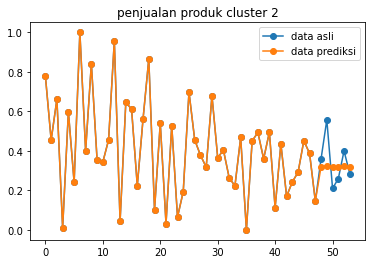

In [25]:
plt.plot(series,marker = 'o',label='data asli')
plt.plot(hasil,marker = 'o',label='data prediksi')
plt.title('penjualan produk cluster 2')
plt.legend()
plt.plot()

In [26]:
# model.save('cluster2_newdata.h5')